In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import sys
from scipy.interpolate import interp1d
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [2]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

ALPHA=1
FIGSIZE=[24,12]
DPI=300

snap_no = 7

In [3]:
outpath = '../../plots/plots_L3N256_variation/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

CDM_runs = [ f'run_CDM_L3N256_DM_dir_{i}' for i in range(10) ] + ['run_CDM_L3N256_DM']

tcDM_runs = [ f'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_{i}' for i in range(10) ] + ['run_2cDM_L3N256_DM_powerm2m2_sigma1']

runs = CDM_runs + tcDM_runs


../../plots/plots_L3N256_variation/ already exists!


In [4]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l    

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

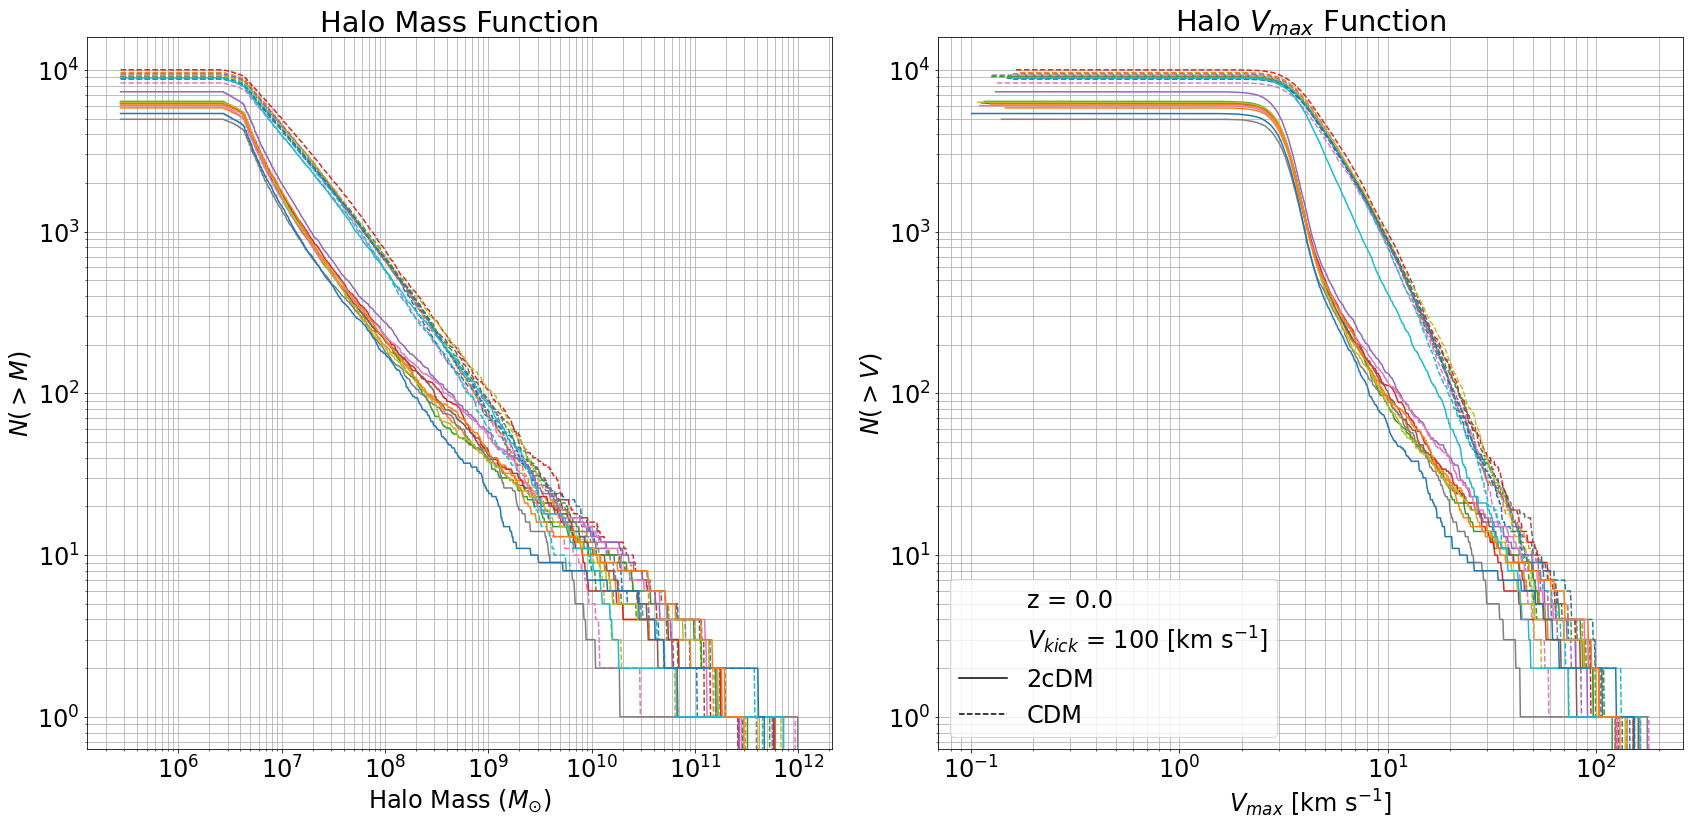

In [5]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    mbins, m = run.load_mass_profile(run.redshifts[snap_no])
    vbins, v = run.load_vel_profile(run.redshifts[snap_no])
    if run.dm_type == '2cDM':
        ax[0].plot(mbins, m, alpha=ALPHA)
        ax[1].plot(vbins, v, alpha=ALPHA)
    else:
        ax[0].plot(mbins, m, '--', alpha=ALPHA)
        ax[1].plot(vbins, v, '--', alpha=ALPHA)
ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')
ax[1].plot([],[], '--', label='CDM', color='k')

ax[1].set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax[1].set_ylabel("$N\\left(>V\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles.png', dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

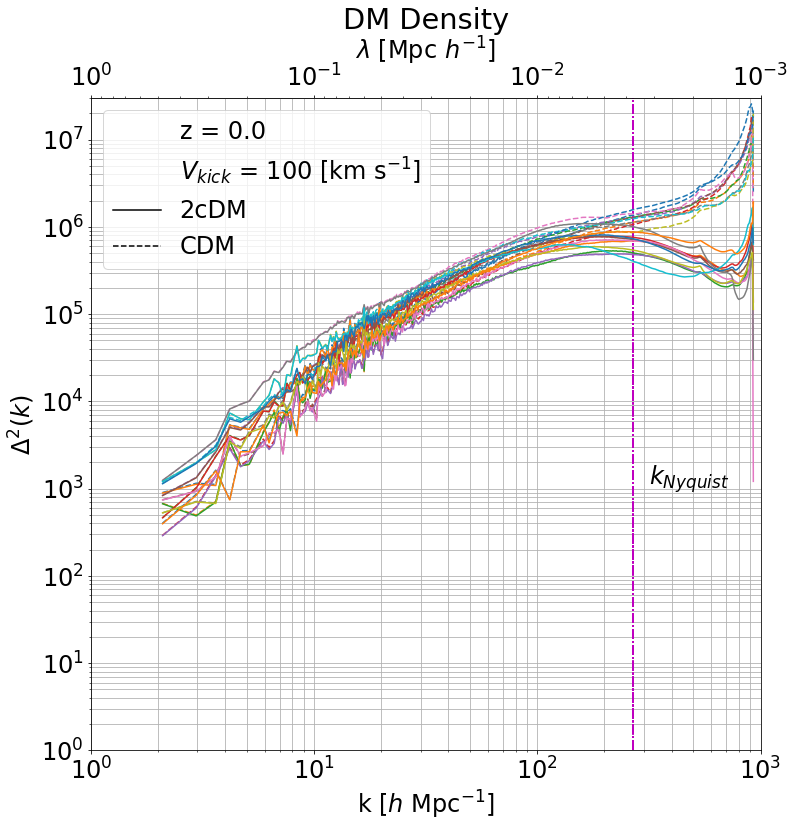

In [6]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

    if run.dm_type == '2cDM':
        ax.plot(bins, dk, alpha=ALPHA)
    else:
        ax.plot(bins, dk, '--', alpha=ALPHA)

    ax.vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')


ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')


ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(10**0, 10**7 + 2*10**7)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax.plot([],[], '-', label='2cDM', color='k')
ax.plot([],[], '--', label='CDM', color='k')

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warning

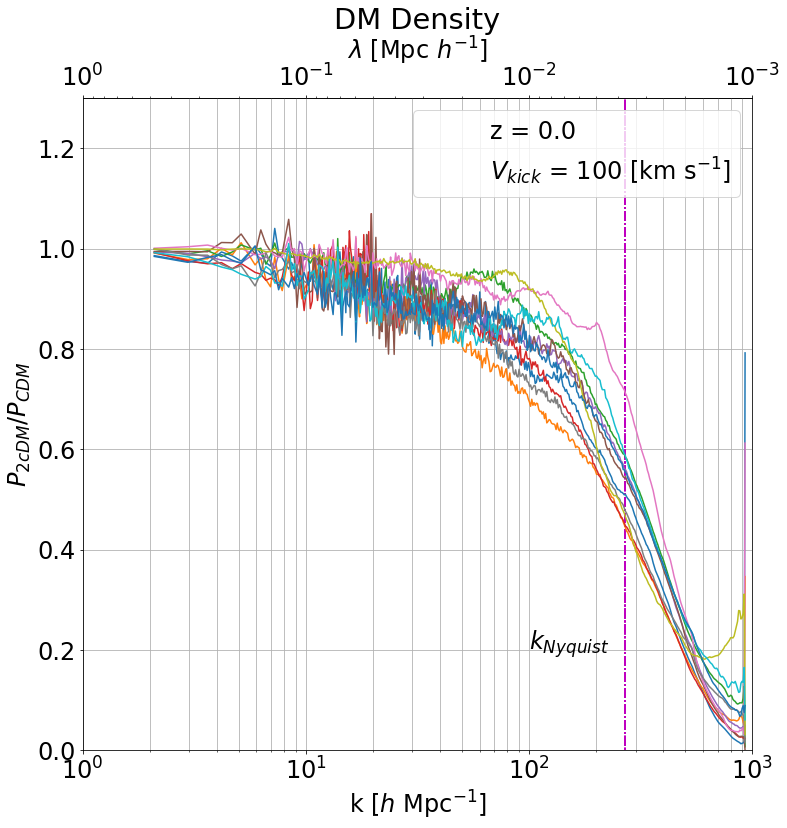

In [7]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

for i, run_n in enumerate(tcDM_runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])
    
    cdm_run = cosmoSim(CDM_runs[i])
    cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(run.redshifts[snap_no])
    ax.plot(bins, pk/cpk, alpha=ALPHA)

    ax.vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')



ax.text(10**2, 0.2, '$k_{Nyquist}$')


ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(0, 1.3)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

In [8]:
def get_samples(domain, interpf_list):
    return [ interpf(domain) for interpf in interpf_list ]

def get_dk_averages(run_list):
    run = cosmoSim(run_list[0])
    lims, pk_interp, dk_interp, k_ny =  run.interp_power_spectra(run.redshifts[snap_no])
    inf = lims[0]
    sup = lims[1]

    interps = []

    for run_n in run_list:
        run = cosmoSim(run_n)
        lims, pk_interp, interp, k_ny =  run.interp_power_spectra(run.redshifts[snap_no])
        interps.append(interp)
        if lims[0] > inf: inf = lims[0]
        if lims[1] < sup: sup = lims[1]
    
    return (inf, sup), interps

def get_hmf_averages(run_list):
    run = cosmoSim(run_list[0])
    lims, interp =  run.interp_mass_profile(run.redshifts[snap_no])
    inf = lims[0]
    sup = lims[1]

    interps = []

    for run_n in run_list:
        run = cosmoSim(run_n)
        lims, interp =  run.interp_mass_profile(run.redshifts[snap_no])
        interps.append(interp)
        if lims[0] > inf: inf = lims[0]
        if lims[1] < sup: sup = lims[1]

    return (inf, sup), interps

def get_cvf_averages(run_list):
    run = cosmoSim(run_list[0])
    lims, interp =  run.interp_vels_profile(run.redshifts[snap_no])
    inf = lims[0]
    sup = lims[1]

    interps = []

    for run_n in run_list:
        run = cosmoSim(run_n)
        lims, interp =  run.interp_vels_profile(run.redshifts[snap_no])
        interps.append(interp)
        if lims[0] > inf: inf = lims[0]
        if lims[1] < sup: sup = lims[1]
    
    return (inf, sup), interps

def calculate_averages(domain, interps):
    samps = get_samples(domain, interps)
    avg = np.mean(samps, axis=0)
    ten = np.percentile(samps, 10, axis=0)
    ninety = np.percentile(samps, 90, axis=0)

    return avg, ten, ninety

def calculate_ratios(domain, interps_numerator, interps_denominator):
    samps_numerator = get_samples(domain, interps_numerator)
    samps_denominator = get_samples(domain, interps_denominator)

    samps = [ num / den for num, den in zip(samps_numerator, samps_denominator) ]
    avg = np.mean(samps, axis=0)
    ten = np.percentile(samps, 10, axis=0)
    ninety = np.percentile(samps, 90, axis=0)

    return avg, ten, ninety


def get_averages(CDM_runs, tcDM_runs, function='dk', ratios=False):

    if function == 'dk':
        get_avg_func = get_dk_averages
    elif function == 'hmf':
        get_avg_func = get_hmf_averages
    elif function == 'cvf':
        get_avg_func = get_cvf_averages

    clims, CDM_interps = get_avg_func(CDM_runs)
    tlims, tcDM_interps = get_avg_func(tcDM_runs)

    inf = clims[0] if clims[0] > tlims[0] else tlims[0]
    sup = clims[1] if clims[1] < tlims[1] else tlims[1]

    domain = np.linspace(inf, sup, num=10000)

    if ratios:
        ratio_samps, ratios_ten, ratios_ninety = calculate_ratios(domain, tcDM_interps, CDM_interps)
        return domain, (ratio_samps, ratios_ten, ratios_ninety)
    else:
        CDM_avg, CDM_ten, CDM_ninety = calculate_averages(domain, CDM_interps)
        tcDM_avg, tcDM_ten, tcDM_ninety = calculate_averages(domain, tcDM_interps)

        return domain, (CDM_avg, CDM_ten, CDM_ninety), (tcDM_avg, tcDM_ten, tcDM_ninety)

In [9]:
k, (CDM_avg, CDM_ten, CDM_ninety), (tcDM_avg, tcDM_ten, tcDM_ninety) = get_averages(CDM_runs, tcDM_runs, function='dk')

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


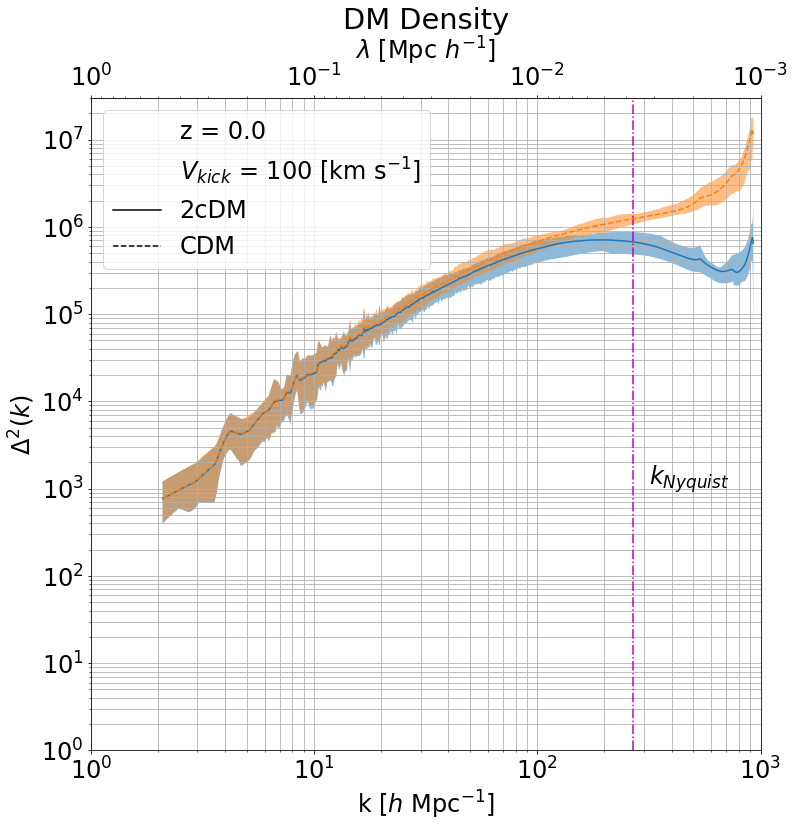

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

ax.plot(k, tcDM_avg, alpha=ALPHA)
ax.fill_between(k, tcDM_ten, tcDM_ninety, alpha=0.5*ALPHA)

ax.plot(k, CDM_avg, '--', alpha=ALPHA)
ax.fill_between(k, CDM_ten, CDM_ninety, alpha=0.5*ALPHA)

ax.vlines(k_ny, 10**0, 10**8, colors='m', linestyles='dashdot')

ax.text(k_ny + 0.5*10**2, 10**3 + 0.1*10**3, '$k_{Nyquist}$')


ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$\Delta^{2}(k)$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(10**0, 10**7 + 2*10**7)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax.plot([],[], '-', label='2cDM', color='k')
ax.plot([],[], '--', label='CDM', color='k')

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_avg_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

In [11]:
k, (ratio_avg, ratio_ten, ratio_ninety) = get_averages(CDM_runs, tcDM_runs, function='dk', ratios=True)

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


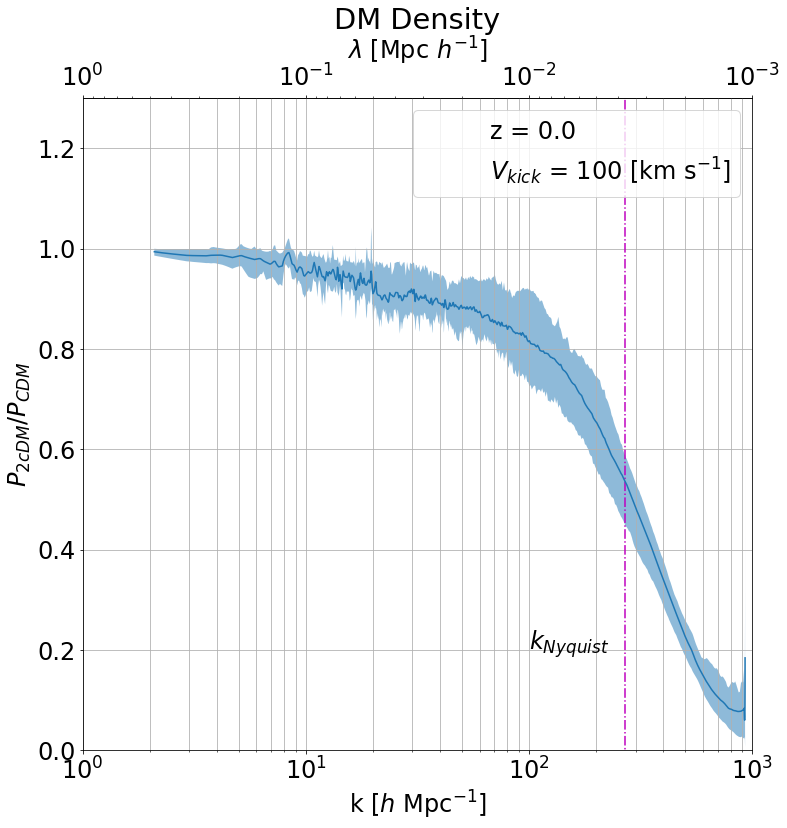

In [12]:
fig, ax = plt.subplots(1, 1, figsize=[12,12])

ax.plot(k, ratio_avg, alpha=ALPHA)
ax.fill_between(k, ratio_ten, ratio_ninety, alpha=0.5*ALPHA)

ax.vlines(k_ny, -3, 3, colors='m', linestyles='dashdot')

ax.text(10**2, 0.2, '$k_{Nyquist}$')

ax.set_xlabel('k [$h$ Mpc$^{-1}$]')
ax.set_ylabel('$P_{2cDM}/P_{CDM}$')
ax.set_xscale('log')
ax.set_xlim(10**0, 10**3)
ax.set_ylim(0, 1.3)
sax = ax.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
ax.grid(True, which="both", ls="-")

ax.plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax.plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)

ax.set_title('DM Density')

ax.legend()

fname = f'z_{run.redshifts[snap_no]}_avg_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')


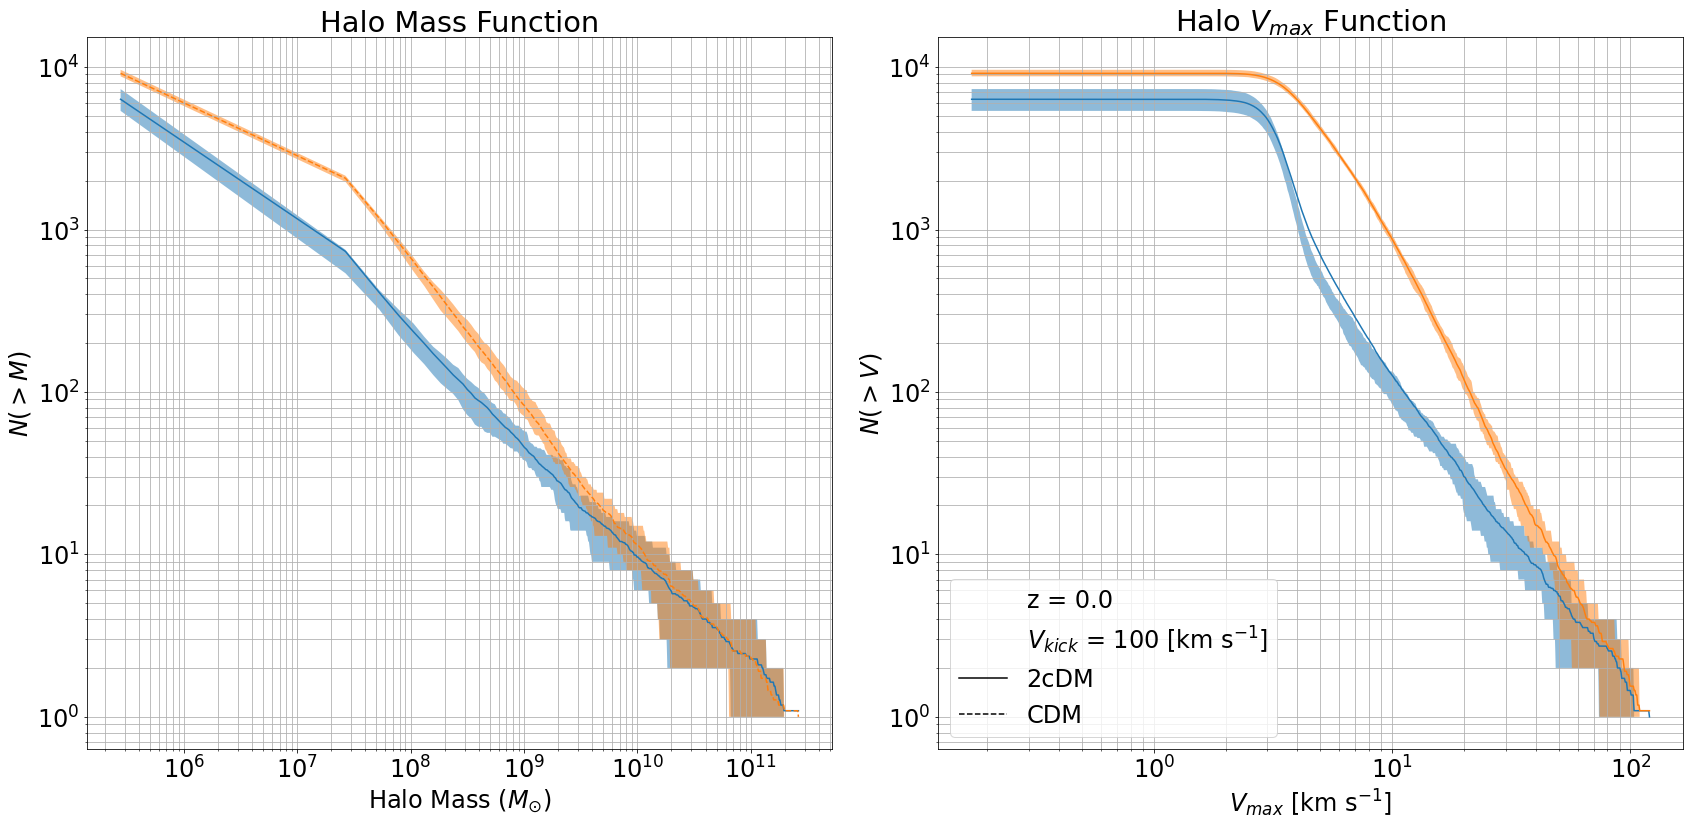

In [13]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

m, (CDM_avg_m, CDM_ten_m, CDM_ninety_m), (tcDM_avg_m, tcDM_ten_m, tcDM_ninety_m) = get_averages(CDM_runs, tcDM_runs, function='hmf')

v, (CDM_avg_v, CDM_ten_v, CDM_ninety_v), (tcDM_avg_v, tcDM_ten_v, tcDM_ninety_v) = get_averages(CDM_runs, tcDM_runs, function='cvf')


ax[0].plot(m, tcDM_avg_m, alpha=ALPHA)
ax[0].fill_between(m, tcDM_ten_m, tcDM_ninety_m, alpha=0.5*ALPHA)
ax[1].plot(v, tcDM_avg_v, alpha=ALPHA)
ax[1].fill_between(v, tcDM_ten_v, tcDM_ninety_v, alpha=0.5*ALPHA)

ax[0].plot(m, CDM_avg_m, '--', alpha=ALPHA)
ax[0].fill_between(m, CDM_ten_m, CDM_ninety_m, alpha=0.5*ALPHA)
ax[1].plot(v, CDM_avg_v, alpha=ALPHA)
ax[1].fill_between(v, CDM_ten_v, CDM_ninety_v, alpha=0.5*ALPHA)

ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')
ax[1].plot([],[], '--', label='CDM', color='k')

ax[1].set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax[1].set_ylabel("$N\\left(>V\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles_avg.png', dpi=DPI)
plt.show()

../../py/cosmoSim.py:54: UserWarning: Vkick not explicitly set! Assuming 100 km/s...
  warnings.warn('Vkick not explicitly set! Assuming 100 km/s...')
/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in true_divide
/home/ryan/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


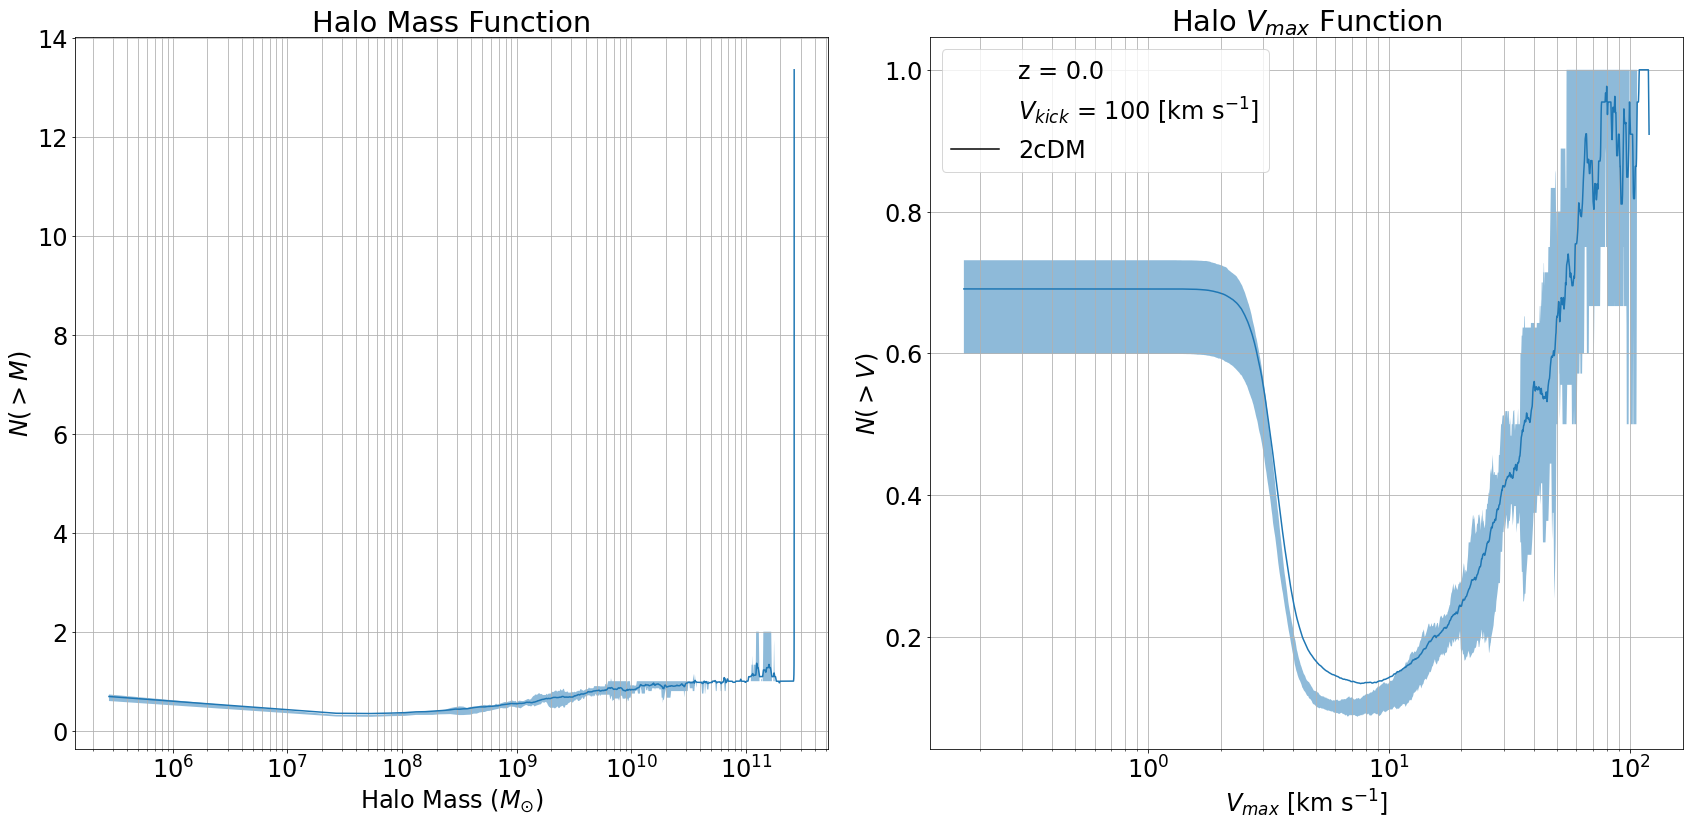

In [14]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

m, (ratios_m, ratios_m_ten, ratios_m_ninety) = get_averages(CDM_runs, tcDM_runs, function='hmf', ratios=True)

v, (ratios_v, ratios_v_ten, ratios_v_ninety) = get_averages(CDM_runs, tcDM_runs, function='cvf', ratios=True)


ax[0].plot(m, ratios_m, alpha=ALPHA)
ax[0].fill_between(m, ratios_m_ten, ratios_m_ninety, alpha=0.5*ALPHA)
ax[1].plot(v, ratios_v, alpha=ALPHA)
ax[1].fill_between(v, ratios_v_ten, ratios_v_ninety, alpha=0.5*ALPHA)

ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '-', label='2cDM', color='k')

ax[1].set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax[1].set_ylabel("$N\\left(>V\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles_ratios_avg.png', dpi=DPI)
plt.show()